In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
df=pd.read_csv('clean-reviews.csv')
df.head()

,rating,title,text,date,size,scent
0,5,I love candles so much that most every day I'm...,Yankee Candle Company candles used to see s...,"April 8, 2018",Medium Perfect Pillar,Christmas Cookie
1,1,Not up to par. Would not recommend.,Dissatisfied purchase. All Yankee Candle pr...,"November 8, 2018",Large Jar,Balsam & Cedar
2,1,Smelled Bad,I purchased three of these candles for my a...,"December 4, 2018",Large Jar,Balsam & Cedar
3,5,the Fresh Scent of a Northern Forest,the scent was so perfect for the holiday se...,"February 1, 2018",Large Jar,Balsam & Cedar
4,5,Favorite Yankee candle scent!,My absolute favorite Yankee candle scent! ...,"January 18, 2018",Large Jar,Balsam & Cedar


In [3]:
#formatting date
df.date= pd.to_datetime(df.date, format='%B %d, %Y')
df['month'] = df.date.dt.strftime('%B')
df['year'] = df.date.dt.strftime('%Y')
df.head()
#df.head()

,rating,title,text,date,size,scent,month,year
0,5,I love candles so much that most every day I'm...,Yankee Candle Company candles used to see s...,2018-04-08,Medium Perfect Pillar,Christmas Cookie,April,2018
1,1,Not up to par. Would not recommend.,Dissatisfied purchase. All Yankee Candle pr...,2018-11-08,Large Jar,Balsam & Cedar,November,2018
2,1,Smelled Bad,I purchased three of these candles for my a...,2018-12-04,Large Jar,Balsam & Cedar,December,2018
3,5,the Fresh Scent of a Northern Forest,the scent was so perfect for the holiday se...,2018-02-01,Large Jar,Balsam & Cedar,February,2018
4,5,Favorite Yankee candle scent!,My absolute favorite Yankee candle scent! ...,2018-01-18,Large Jar,Balsam & Cedar,January,2018


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

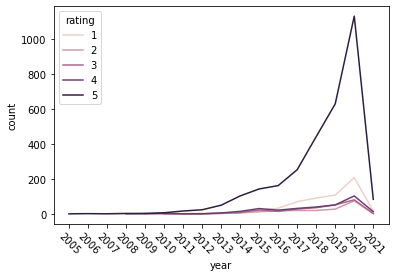

In [4]:
ld = df
rating_sum=ld.groupby(['year','rating'])['rating'].count().to_frame('count').reset_index()

rating_sum.head()

sns.lineplot(data=rating_sum, x='year', y='count', hue='rating')

plt.xticks(rotation=-45)


appears that proportion of 5 star ratings increased over time.
decrease in 2021 reviews due to the fact that its only been a month in.
Think might just look at 2020 reviews vs 2019 for more accurate representation

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

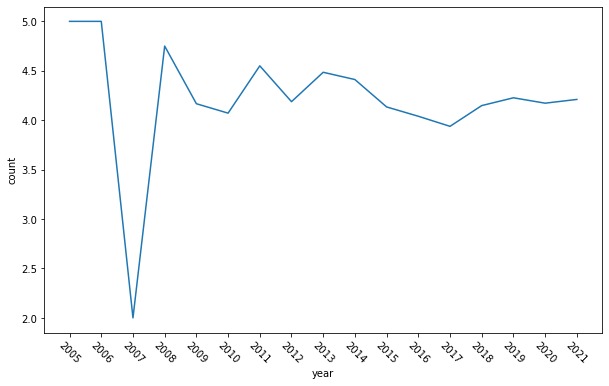

In [5]:
ld = df
rating_sum=ld.groupby(['year'])['rating'].mean().to_frame('count').reset_index()

rating_sum.head()

plt.figure(figsize=(10,6))

sns.lineplot(data=rating_sum, x='year', y='count')

plt.xticks(rotation=-45)


overall (aside from dip in 2007), it appears that the average reviews has been constant. Does not appear to have a significant dip in 2020

In [6]:
hmm=ld.groupby(['year'])['rating'].count()
print(hmm)

year
2005       1
2006       2
2007       4
2008       4
2009       6
2010      14
2011      20
2012      32
2013      66
2014     141
2015     231
2016     251
2017     403
2018     629
2019     869
2020    1597
2021     119
Name: rating, dtype: int64


looking at why 2007 had such a huge dip. Very few reviews skew the mean down. In this case, may only look at 2014 onwards or do the 2020 vs 2019 thing that i have previously mentioned

<AxesSubplot:xlabel='month', ylabel='count'>

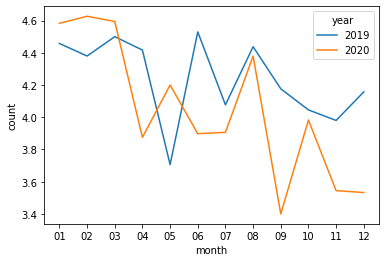

In [62]:
#formatting date
yt = df
yt['my'] = yt.date.dt.strftime('%m-%Y')
yt['month']=yt.date.dt.strftime('%m')
yt.head()

#monthly trend 2020 vs 2019
year =['2019','2020']
yeardf = yt[yt['year'].isin(year)]
yeardf.head()

mld=yeardf.groupby(['my'])['rating'].mean().to_frame('count').reset_index()
mld['month']= mld['my'].str.extract(r'^(..)')
mld['year']= mld['my'].str.extract(r'(....)$')
mld.head()


sns.lineplot(data=mld, x='month', y='count', hue='year')


#plt.xticks(rotation=-45)




Big dip in sept 2020 and appears to have lower reviews towards the end of the year. This is the mean. 

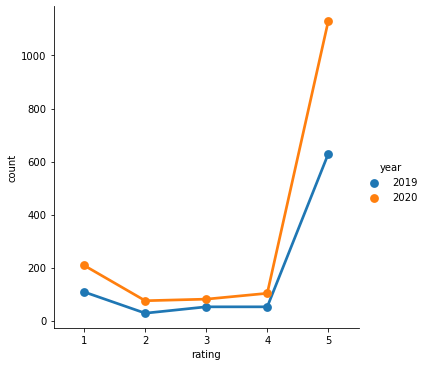

In [67]:
catplot=yeardf.groupby(['rating','year'])['rating'].count().to_frame('count').reset_index()

catplot.head()

sns.catplot(x='rating',y='count',hue='year',kind='point',data=catplot)


should probably look at a normalized version because there were more reviews in 2020

In [76]:
catplot.head()
total=catplot['count'].sum()
twnty=catplot[catplot['year']=='2020']['count'].sum()
nntn=catplot[catplot['year']=='2019']['count'].sum()
#print(total,twnty,nntn, nntn+twnty)


2466 1597 869 2466


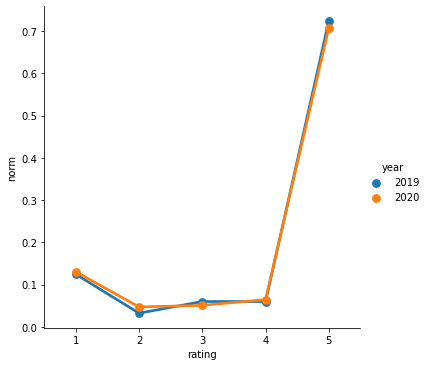

In [90]:
tmp = catplot

tmp.loc[tmp['year']=='2020','norm']=tmp['count']/twnty
tmp.loc[tmp['year']=='2019','norm']=tmp['count']/nntn
tmp.head()


sns.catplot(x='rating',y='norm',hue='year',kind='point',data=tmp)



Normalized results show virutally no difference between 2020 and 2019 in terms of ratings. perhaps topic modeling would suggest a difference in topics